# Mentale Gesundheit: Eine Reise durch die Psyche

## Eine Reise durch die Psyche: Wie Daten uns helfen können, mentale Gesundheit zu verstehen

## 1 - Einleitung
Depressionen, Angstzustände und Stress sind in unserer modernen Gesellschaft allgegenwärtig und betreffen Menschen jeden Alters, Geschlechts und Hintergrunds. Obwohl es viele Ressourcen gibt, die versuchen, das Bewusstsein für diese Themen zu schärfen, bleibt ihre Ursache größtenteils unbekannt. Eine Möglichkeit, mehr über diese Phänomene zu erfahren, besteht darin, die Daten der Depression Anxiety Stress Scales (DASS) zu nutzen, die zwischen 2017 und 2019 gesammelt wurden. Die DASS-Umfrage ist ein standardisierter Fragebogen, der darauf abzielt, Depressionen, Angstzustände und Stress bei Befragten zu messen. Entwickelt wurde der psychometrische Fragebogen von Dr. Peter Lovibond und Dr. Stephen Lovibond und besteht aus 42 Fragen, die jeweils von 1 bis 4 skaliert sind. Die Bewertungsmöglichkeiten sind unten abgebildet und bilden ab, ob die Frage sehr stark auf die befragte Person zutrifft (4 Apply to me very much, or most of the time) oder gar keine Übereinstimmung it der Frage vorhanden ist (1 Did not apply to me at all)

![DASS-Skala](db/demo1.png)


## 2 - Ziel des Notebooks
Analyse der DASS-Umfrageergebnisse und Untersuchung potenzieller Faktoren, die mit Depressionen, Angstzuständen und Stress assoziiert sind. Besonders im Vordergrund stehen Vorurteile, die es gegenüber Depressionen und ähnlichen Krankheiten gibt in Hinblick auf das Geschlecht und die Herkunft. . Ist es tatsächlich so, dass Frauen eher an einer Depression leiden? Trifft Menschen mit einem akademischen Abschluss eine Depression seltener, weil er wahrscheinlich ein höheres Gehalt verspricht oder ist das nur Schein? Gibt es einen Zusammenhang zwischen Depressionen und Herkunft? Auf diese und ähnliche Fragen wird in der Analyse eingegangen.

## 3 - Methodik

Wie bereits unter dem Punkt Einleitung angemerkt, wurden die Daten wurden durch eine Online-Version der DASS-Umfrage von 2017 bis 2019 gesammelt. Dadurch ist ein aussagekräftiges Ergebnis von fast 40.000 Daten entstanden. Ebenfalls schon erwähnt wurde die Skalierung durch die DASS-Umfrage, wodurch eine Bewertung der Ergebnisse ermöglicht wird. Insgesamt standen 42 Fragen zur Verfügung, die durch die Bewertung beantwortet werden mussten. Allerdings wurden nicht nur die Antworten gespeichert, sondern auch einerseits die Geschwindigkeit, in der diese beantwortet wurden und andererseits die Stelle, an der sie gefragt wurden, weil jeder Befragte eine zufällige Anordnung der Fragen erhalten hat. Darauffolgend wurde der TEN-ITEM PERSONALITY INVENTORY-(TIPI) durchgeführt, welcher Persönlichkeitseigenschaften analysiert. Bei dieser Umfrage stehen 10 Charaktereigenschaften zur Verfügung, die erneut skaliert und beantwortet werden müssen, wobei es hier 7 Bewertungsmöglichkeiten gibt.

![TIPI](db/TIPI.png)

Zuguterletzt wurden die Stammdaten der Teilnehmer befragt, welche Daten, wie Geschlecht, Alter, Herkunft enthalten.

![Stammdaten](db/Stammdaten.png)

Die Umfrage war für jeden offen, und die Teilnehmer waren motiviert, sie auszufüllen, um personalisierte Ergebnisse zu erhalten.
Die Daten, die in dieser Analyse verwendet wurden, wurden von Personen gesammelt, die einer Forschungsumfrage zugestimmt und ihre Daten für Forschungszwecke zur Verfügung gestellt haben.
Die Analyse wird basierend auf den Antworten zu jeder Frage sowie den demografischen und technischen Informationen durchgeführt, die von den Teilnehmern bereitgestellt wurden. Insgesamt hat es

Durch die Analyse der Daten der DASS-Umfrage hoffen wir, Einblicke in die Faktoren zu gewinnen, die mit Depressionen, Angstzuständen und Stress assoziiert sind. Diese Erkenntnisse könnten dazu beitragen, Präventions- und Behandlungsansätze zu entwickeln, um das Leben von Menschen, die von diesen Zuständen betroffen sind, zu verbessern. Idealerweise kann dadurch eine Entstigmatisierung von psychischen Krankheiten erreicht werden.

## 4 - Projektstruktur

### Setup

![Architektur](db/Projekt-Architektur.png)

Für das Projekt werden auf den lokalen Rechnern Conda für die Python-Execution, DataSpell als IDE und je nach Projektmitglied teilweise MongoDB Compass oder DataGrip als GUI verwendet, um einen einfacheren Einblick zum Datenbank-Server zu erhalten. Die Datenbank selbst ist eine MongoDB Instanz, welche am FHTW-Server gehostet wird. Dadurch sind die Daten zentral für alle Teammitglieder zugänglich. Zusätzlich gibt es auf GitHub ein Repository, welches alle wichtigen Files sowie dieses Notebook selbst beinhaltet, um allen Mitgliedern des Teams die simultane Bearbeitung zu ermöglichen.

### Komponente und Versionen

- Conda: 22.9
- Python: 3.9
- Pymongo: 4.3.3
- Pandas: 1.4.4
- Matplotlib: 3.5.2
- Numpy: 1.21.5

## 5 - Datenimport und -export

Bevor wir nun den Datensatz analysieren können, müssen wir die Daten zur Datenbank hochladen, um sie später weiterhin zentral zur Verfügung zu haben. Dafür müssen wir einige Python Packages installieren, die DB-Verbindung einrichten und anschließend den Datensatz in einem Pandas-Dataframe speichern.

### Import von Packages

In [221]:
try:
    import pymongo as mdb
    import csv
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
except ImportError:
    !pip3 install pymongo
    !pip3 install python-csv
    !pip3 install pandas
    !pip3 install numpy
    import pymongo as mdb
    import csv
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np

### Die Verbindung zum MongoDB-Server wird eingerichtet

In [222]:
try:
    client = mdb.MongoClient("mongodb://pt-n20.p4001.w3.cs.technikum-wien.at:4001")

    db = client.mental_health_db
    collection = db.survey

    if 'mental_health_db' in client.list_database_names():
        print('Connected to database')
    if 'survey' in db.list_collection_names():
        print('Connected to collection')
except mdb.errors.ConnectionFailure as e:
    print(e)

Connected to database
Connected to collection


### CSV-Datensatz hochladen

Die Daten wurden mithilfe des Codes, den man darunter sieht, auf den Server hochgeladen und anschließend auskommentiert, damit dies nicht unabsichtlich wieder ausgeführt werden kann.

In [223]:
'''data = pd.read_csv('db/data.csv', delimiter='\t')
keys = data.columns.tolist()
data_dict = data.to_dict('records')
for item in data_dict:
    record = {}
    for key in keys:
        record[key] = item[key]
    collection.insert_one(record)'''

"data = pd.read_csv('db/data.csv', delimiter='\t')\nkeys = data.columns.tolist()\ndata_dict = data.to_dict('records')\nfor item in data_dict:\n    record = {}\n    for key in keys:\n        record[key] = item[key]\n    collection.insert_one(record)"

### Daten vom Server abfragen und in Pandas Dataframe speichern

In [224]:
cursor = collection.find({})
data = pd.DataFrame(list(cursor))
data = data.drop('_id', axis=1)
client.close()

#### Alternativ falls der Server nicht funktioniert von lokaler CSV-Datei abfragen

In [225]:
# data = pd.read_csv('db/data.csv', delimiter='\t')

In [226]:
print(data)

       Q1A  Q1I    Q1E  Q2A  Q2I   Q2E  Q3A  Q3I    Q3E  Q4A  ...  screensize  \
0        4   28   3890    4   25  2122    2   16   1944    4  ...           1   
1        4    2   8118    1   36  2890    2   35   4777    3  ...           2   
2        3    7   5784    1   33  4373    4   41   3242    1  ...           2   
3        2   23   5081    3   11  6837    2   37   5521    1  ...           2   
4        2   36   3215    2   13  7731    3    5   4156    4  ...           2   
...    ...  ...    ...  ...  ...   ...  ...  ...    ...  ...  ...         ...   
39770    2   31   3287    1    5  2216    3   29   3895    2  ...           2   
39771    3   14   4792    4   41  2604    3   15   2668    4  ...           1   
39772    2    1  25147    1    4  4555    2   14   3388    1  ...           2   
39773    3   36   4286    1   34  2736    2   10   5968    2  ...           2   
39774    2   28  32251    1   22  3317    2    4  11734    1  ...           1   

       uniquenetworklocatio

## 6 - Demografische Analyse des Datensatzes

Wir fangen damit an, den Datensatz zu analysieren, um einen Überblick zu bekommen.

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


In [228]:
data.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,...,39775.000000,39775.000000,39775.000000,39775.00000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.619485,21.555977,6.970591e+03,2.172269,21.248070,5.332376e+03,2.226097,21.583004,7.426446e+03,1.950170,...,23.612168,1.274519,1.200025,1.13516,7.555852,1.642992,31.312885,1.705795,1.159547,3.510270
std,1.032117,12.133621,8.670513e+04,1.111563,12.125288,2.651361e+04,1.038526,12.115637,1.587024e+05,1.042218,...,21.581722,0.446277,0.400024,0.40030,3.554395,1.351362,25.871272,0.473388,0.445882,2.141518
min,1.000000,1.000000,1.800000e+02,1.000000,1.000000,1.760000e+02,1.000000,1.000000,-1.081400e+04,1.000000,...,13.000000,1.000000,1.000000,0.00000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,2.000000,11.000000,2.664000e+03,1.000000,11.000000,2.477000e+03,1.000000,11.000000,2.857000e+03,1.000000,...,18.000000,1.000000,1.000000,1.00000,4.000000,1.000000,10.000000,1.000000,1.000000,2.000000
50%,3.000000,22.000000,3.609000e+03,2.000000,21.000000,3.511000e+03,2.000000,22.000000,3.898000e+03,2.000000,...,21.000000,1.000000,1.000000,1.00000,10.000000,1.000000,10.000000,2.000000,1.000000,3.000000
75%,4.000000,32.000000,5.358000e+03,3.000000,32.000000,5.216000e+03,3.000000,32.000000,5.766000e+03,3.000000,...,25.000000,2.000000,1.000000,1.00000,10.000000,2.000000,60.000000,2.000000,1.000000,4.000000
max,4.000000,42.000000,1.210228e+07,4.000000,42.000000,2.161057e+06,4.000000,42.000000,2.858269e+07,4.000000,...,1998.000000,2.000000,2.000000,3.00000,12.000000,5.000000,70.000000,2.000000,3.000000,133.000000


Konkret jedoch wollen wir wissen, welche Personen haben an dieser Umfrage teilgenommen und welche Merkmale machen diesen Datensatz aus. Dafür verschaffen wir uns einen deskriptiven Überblick zu folgenden Kategorien des Datensatzes:

- Ausbildung
- Gegend
- Geschlecht
- Englisch als Muttersprache
- Alter
- Händigkeit
- Religion
- Sexuelle Orientation
- Ethnie
- Gewählt
- Verheiratet
- Familiengröße
- Studienfach

### Ausbildung

C:\Users\maria\AppData\Local\Temp\ipykernel_24080\2847404692.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1f}%'.format(x) for x in ax.get_yticks()])


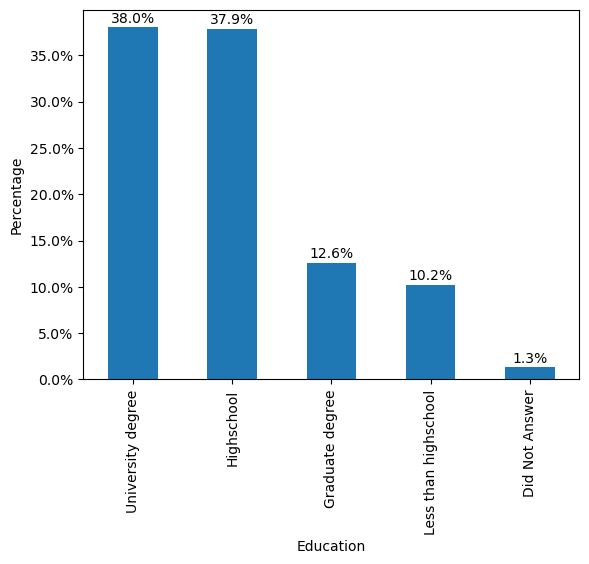

In [229]:
education = data['education'].map({0: 'Did Not Answer', 1: 'Less than highschool', 2: 'Highschool', 3: 'University degree', 4: 'Graduate degree'})
education_percent = education.value_counts(normalize=True) * 100
ax = education_percent.plot(kind='bar')
ax.set_xlabel('Education')
ax.set_ylabel('Percentage')
ax.set_yticklabels(['{:,.1f}%'.format(x) for x in ax.get_yticks()])
for i, v in enumerate(education_percent):
    ax.text(i, v+0.5, '{:.1f}%'.format(v), ha='center')
plt.show()

Wir sehen, dass ungefähr 38% der Teilnehmer*Innen einen Bachelor-Abschluss, knapp darunter 37.9% einen Highschool-Abschluss, 12.6% einen Master-Abschluss und 10.2% die Highschool nicht abgeschlossen haben. Im Datensatz haben 1.3% jeweils keine Antwort zu dieser Frage gegeben.

### Gegend

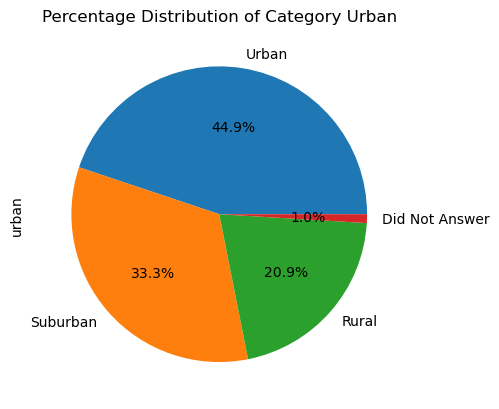

In [230]:
urban = data['urban'].map({0: 'Did Not Answer', 1: 'Rural', 2: 'Suburban', 3: 'Urban'})
urban_percent = urban.value_counts(normalize=True) * 100
ax = urban_percent.plot(kind='pie', autopct='%.1f%%')
ax.set_title('Percentage Distribution of Category Urban')
plt.show()

Das Diagramm zeigt die prozentuale Verteilung der Antworten auf die Frage nach dem Wohnort. Die größte Gruppe der Befragten (44,9%) lebt in städtischen Gebieten, gefolgt von der Gruppe der Vorortbewohner (33,3%) und der Gruppe der Landbewohner (20,9%). Nur eine sehr kleine Gruppe (1%) hat keine Antwort auf die Frage gegeben.

### Geschlecht

C:\Users\maria\AppData\Local\Temp\ipykernel_24080\4048547184.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1f}%'.format(x) for x in ax.get_yticks()])


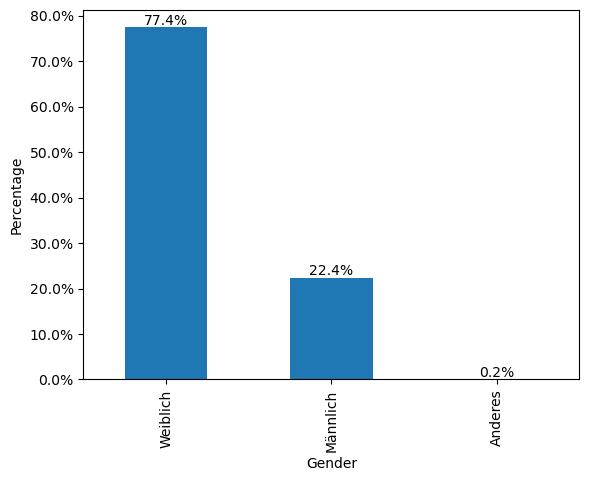

In [231]:
gender = data['gender'].map({0: 'Anderes', 1: 'Männlich', 2: 'Weiblich'})
gender_percent = gender.value_counts(normalize=True) * 100
ax = gender_percent.plot(kind='bar')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
ax.set_yticklabels(['{:,.1f}%'.format(x) for x in ax.get_yticks()])
for i, v in enumerate(gender_percent):
    ax.text(i, v+0.5, '{:.1f}%'.format(v), ha='center')
plt.show()

In [232]:
print(data)

       Q1A  Q1I    Q1E  Q2A  Q2I   Q2E  Q3A  Q3I    Q3E  Q4A  ...  screensize  \
0        4   28   3890    4   25  2122    2   16   1944    4  ...           1   
1        4    2   8118    1   36  2890    2   35   4777    3  ...           2   
2        3    7   5784    1   33  4373    4   41   3242    1  ...           2   
3        2   23   5081    3   11  6837    2   37   5521    1  ...           2   
4        2   36   3215    2   13  7731    3    5   4156    4  ...           2   
...    ...  ...    ...  ...  ...   ...  ...  ...    ...  ...  ...         ...   
39770    2   31   3287    1    5  2216    3   29   3895    2  ...           2   
39771    3   14   4792    4   41  2604    3   15   2668    4  ...           1   
39772    2    1  25147    1    4  4555    2   14   3388    1  ...           2   
39773    3   36   4286    1   34  2736    2   10   5968    2  ...           2   
39774    2   28  32251    1   22  3317    2    4  11734    1  ...           1   

       uniquenetworklocatio

Überraschenderweise sind 77.4% der Personen, die an der Umfrage teilgenommen haben, Frauen. Im Gegensatz dazu beträgt der Anteil der Männer 22.4% und die der anderen Geschlechter 0.2%.

### Englisch als Muttersprache

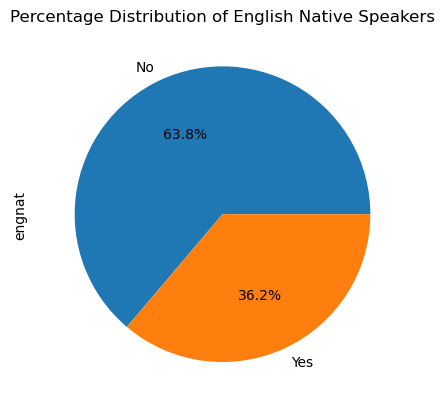

In [233]:
engnat = data['engnat'].map({1: 'Yes', 2: 'No'})
engnat_percent = engnat.value_counts(normalize=True) * 100
ax = engnat_percent.plot(kind='pie', autopct='%.1f%%')
ax.set_title('Percentage Distribution of English Native Speakers')
plt.show()

In unserem Datensatz haben 63.8% Englisch nicht als Muttersprache und 36.2% hingegen schon.

### Alter

C:\Users\maria\AppData\Local\Temp\ipykernel_24080\1368563100.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1f}%'.format(x) for x in ax.get_yticks()])


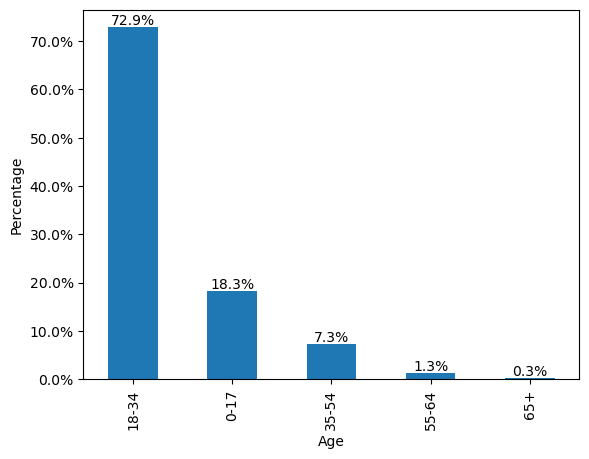

In [234]:
age_groups = pd.cut(data['age'], bins=[0, 17, 34, 54, 64, 150], labels=['0-17', '18-34', '35-54', '55-64', '65+'])
age_group_percent = age_groups.value_counts(normalize=True) * 100
ax = age_group_percent.plot(kind='bar')
ax.set_xlabel('Age')
ax.set_ylabel('Percentage')
ax.set_yticklabels(['{:,.1f}%'.format(x) for x in ax.get_yticks()])
for i, v in enumerate(age_group_percent):
    ax.text(i, v+0.5, '{:.1f}%'.format(v), ha='center')
plt.show()

Wir gruppieren das Alter sinnvoll und erhalten folgende Prozentsätze für die Altersgruppen:

- 0-17: 18.3%
- 18-34: 72.9%
- 35-54: 7.3%
- 55-64: 1.3%
- 65+: 0.3%

### Händigeit
Es wird untersucht, wie viel Prozent der Befragten Linkshänder, Rechtshänder beziehungsweise beidhändig sind. In einem ersten Schritt werden die Daten einfach ausgegeben.

In [235]:
hand = data['hand'].map({2:'Linkshänder',1:'Rechtshänder',3:'Beidhändig'})

hand_percent=hand.value_counts(normalize=True)*100

print(hand_percent)


Rechtshänder    87.727893
Linkshänder     10.532296
Beidhändig       1.739811
Name: hand, dtype: float64


In einem zweiten Schritt wird zur Veranschaulichung ein Balkendiagramm erstellt, welches das Verhältnis zwischen Linkshändern,
Rechtshändern und Beidhändigen aufzeigt.

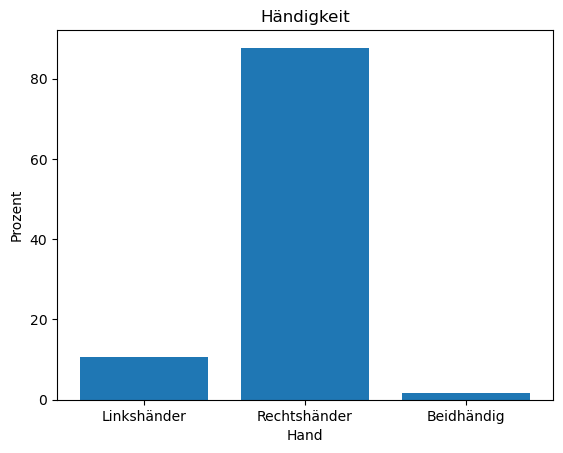

In [236]:
labels = ['Linkshänder', 'Rechtshänder', 'Beidhändig']
values = [hand_percent.Linkshänder, hand_percent.Rechtshänder, hand_percent.Beidhändig]

plt.bar(labels, values)
plt.title('Händigkeit')
plt.xlabel('Hand')
plt.ylabel('Prozent')
plt.show()

### Religion
Es wird untersucht, wie das Religionsbekenntnis unter den Befragten verteilt ist. In einem ersten Schritt werden die Daten einfach ausgegeben.

In [237]:
religions = data['religion'].map({1:'Agnostiker',2:'Atheisten', 3:'Buddhisten', 4:'Christen(Katholisch)',
            5:'Christ(Mormonen)',6: 'Christen(Protestanten)', 7:'Christen(Anderes)', 8:'Hindus',9: 'Juden', 10:'Muslime', 11:'Sikh',12: 'Andere'})

rel_percent=religions.value_counts(normalize=True)*100
print(rel_percent)

Muslime                   55.995840
Atheisten                  9.754179
Agnostiker                 8.232071
Christen(Katholisch)       7.856617
Christen(Anderes)          5.718055
Andere                     4.576473
Christen(Protestanten)     3.916893
Hindus                     1.775793
Buddhisten                 1.336919
Juden                      0.365306
Christ(Mormonen)           0.309495
Sikh                       0.162358
Name: religion, dtype: float64


In einem zweiten Schritt wird zur Veranschaulichung ein Kreisdiagramm erstellt, was das Verhältnis der einzelnen Religionen zueinander unter den Befragten aufzeigt.

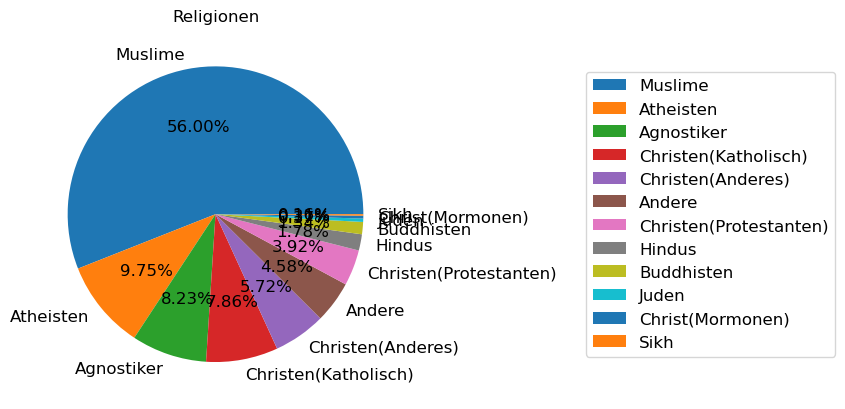

In [238]:
plt.pie(rel_percent, labels=rel_percent.index, autopct='%1.2f%%', textprops={'fontsize': 12})
plt.legend(bbox_to_anchor=(2.2,0.5), loc="center right", fontsize=12)
plt.title('Religionen')
plt.show()

### Sexuelle Orientierung
Es wird untersucht, wie die sexuelle Orientierung unter den Befragten verteilt ist. In einem ersten Schritt werden die Daten einfach ausgegeben.

In [239]:
orientations = data['orientation'].map({0:'Nicht beantwortet',1:'Heterosexuell', 2:'Bisexuell',3: 'Homosexuell',4: 'Asexuell',5: 'Anderes'})
orientations_percent=orientations.value_counts(normalize=True)*100

print(orientations_percent)

Heterosexuell        61.015713
Bisexuell            12.585795
Anderes               8.698931
Nicht beantwortet     7.816468
Asexuell              4.967945
Homosexuell           4.915148
Name: orientation, dtype: float64


In einem zweiten Schritt wird zur Veranschaulichung ein Kreisdiagramm erstellt, welches das Verhältnis der einzelnen Religionen zueinander unter den Befragten aufzeigt.

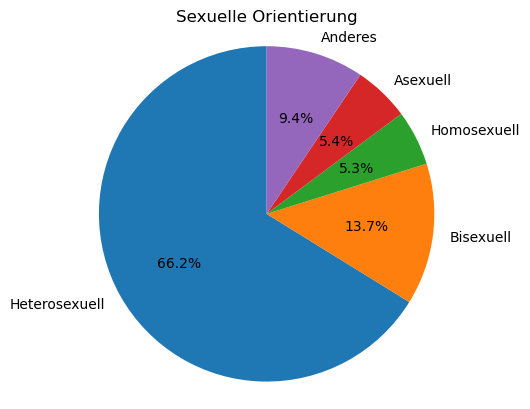

In [240]:

values = [orientations_percent.Heterosexuell,orientations_percent.Bisexuell, orientations_percent.Homosexuell, orientations_percent.Asexuell,orientations_percent.Anderes]
labels=['Heterosexuell','Bisexuell','Homosexuell','Asexuell','Anderes']
fig1, ax1 = plt.subplots()
ax1.pie(values,  labels=labels,autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sexuelle Orientierung')
plt.show()

### Ethnische Gruppen
Es wird untersucht, was für eine Verteilung der Ethnischen Gruppen vorliegt. In einem ersten Schritt werden die Daten einfach ausgegeben.

In [241]:
races = data['race'].map({10: "Asiaten", 20: "Araber", 30: "Schwarze", 40: "IndigeneBevölkerungAustraliens", 50: "IndigeneBevölkerungAmerikas", 60: "Weiße", 70: "Anderes"})
races_percent=races.value_counts(normalize=True)*100

print(races_percent)

Asiaten                           58.091766
Weiße                             26.798240
Anderes                           12.148334
Schwarze                           1.516028
Araber                             0.837209
IndigeneBevölkerungAmerikas        0.553111
IndigeneBevölkerungAustraliens     0.055311
Name: race, dtype: float64


In einem zweiten Schritt wird zur Veranschaulichung ein Balkendiagramm erstellt, welches das Verhältnis der einzelnen Ethnischen Gruppen zueinander unter den Befragten aufzeigt.

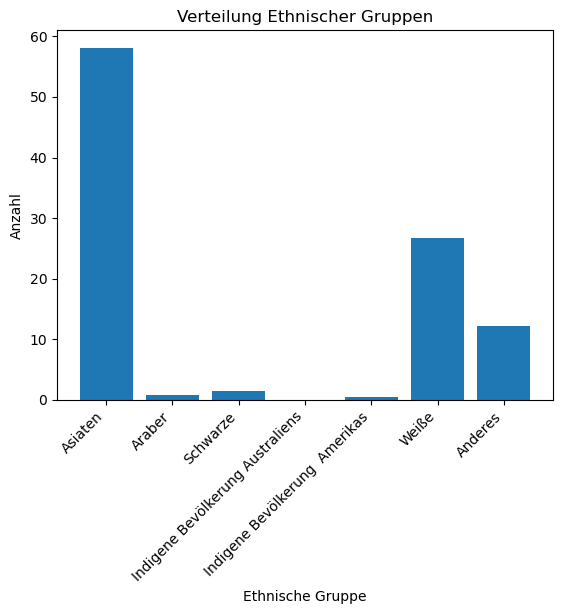

In [242]:
labels = ['Asiaten','Araber','Schwarze','Indigene Bevölkerung Australiens','Indigene Bevölkerung  Amerikas','Weiße', 'Anderes']
values = [races_percent.Asiaten,races_percent.Araber, races_percent.Schwarze, races_percent.IndigeneBevölkerungAustraliens,
          races_percent.IndigeneBevölkerungAmerikas, races_percent.Weiße,races_percent.Anderes]
plt.bar(labels, values)
plt.xlabel("Ethnische Gruppe")
plt.ylabel("Anzahl")
plt.title("Verteilung Ethnischer Gruppen")
plt.xticks(rotation=45, ha='right')
plt.show()

In [243]:
voted = data['voted']
unique_values_voted = list(set(voted))
print(unique_values_voted)

[0, 1, 2]


In [244]:
value_counts_voted =voted.value_counts()

In [245]:
for value, count in value_counts_voted.items():
    print(f'{value}: {count}')

2: 28400
1: 11048
0: 327


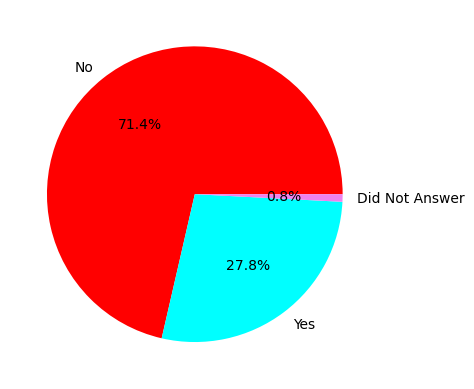

In [246]:
value_counts_voted = voted.value_counts()
plt.pie(value_counts_voted, labels=['No','Yes','Did Not Answer'], autopct='%1.1f%%',colors=['red','cyan','violet'])
plt.show()

In [247]:
married = data['married'].dropna()
unique_values_married = list(set(married))
print(unique_values_married)


[0, 1, 2, 3]


In [248]:
value_counts_married = married.value_counts()

In [249]:
for value, count in value_counts_married.items():
    print(f'{value} : {count}')

1 : 34131
2 : 4357
3 : 1092
0 : 195


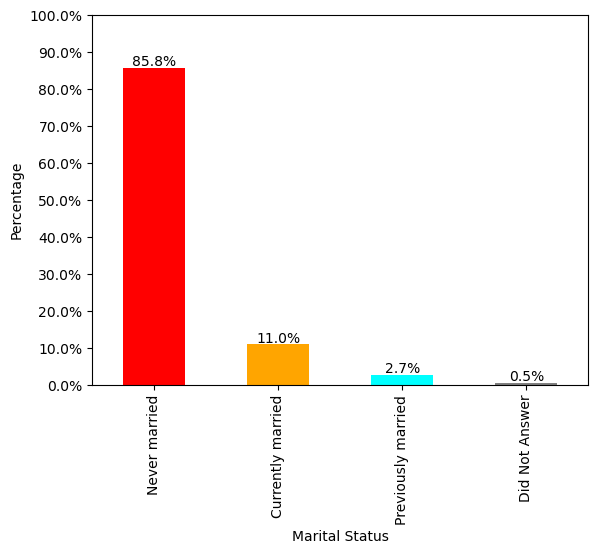

In [250]:
married_dict = {0: 'Did Not Answer', 1: 'Never married', 2: 'Currently married', 3: 'Previously married'}

married_legend = data['married'].replace(married_dict)

married_counts = married_legend.value_counts()

married_percent = married_counts * 100 / married_counts.sum()

ax = married_percent.plot(kind='bar', color=['red','orange','cyan','grey'])
ax.set_xlabel('Marital Status')
ax.set_ylabel('Percentage')
ax.set_yticks(range(0, 101, 10))
ax.set_yticklabels(['{:,.1f}%'.format(x) for x in range(0, 101, 10)])
for i, v in enumerate(married_percent):
    ax.text(i, v+0.5, '{:.1f}%'.format(v), ha='center')
plt.show()


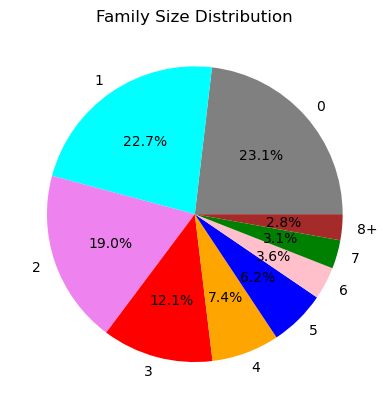

In [251]:
family_size = data['familysize'].dropna()

family_size = family_size.apply(lambda x: '8+' if isinstance(x, int) and x >= 8 else str(x))

labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8+']
plt.pie(family_size.value_counts(), labels=labels, autopct='%1.1f%%', colors=['grey', 'cyan', 'violet', 'red', 'orange', 'blue', 'pink', 'green', 'brown'])
plt.title('Family Size Distribution')
plt.show()


In [252]:
#major = data['major']
#unique_values_major = list(set(major))
#print(unique_values_major)
# - Wir sehen, dass die Daten nicht vollständig sind und man kann nur mit Nan und nicht nan Werte eine Analyse machen

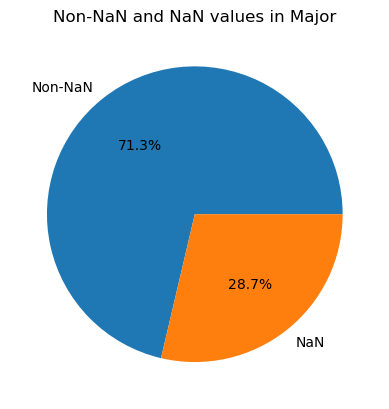

In [253]:
data['major_category'] = data['major'].apply(lambda x: 'Non-NaN' if x is not None and x == x else 'NaN')

major_counts = data['major_category'].value_counts()

major_percent = major_counts * 100 / major_counts.sum()

major_percent.plot(kind='pie', autopct='%1.1f%%')
plt.title('Non-NaN and NaN values in Major')
plt.ylabel('')
plt.show()

## DASS-Scores berechnen

In [254]:
question_category_map = {
    'Q3A': 'Depression',
    'Q5A': 'Depression',
    'Q10A': 'Depression',
    'Q13A': 'Depression',
    'Q16A': 'Depression',
    'Q17A': 'Depression',
    'Q21A': 'Depression',
    'Q24A': 'Depression',
    'Q26A': 'Depression',
    'Q31A': 'Depression',
    'Q34A': 'Depression',
    'Q37A': 'Depression',
    'Q38A': 'Depression',
    'Q42A': 'Depression',
    'Q2A': 'Anxiety',
    'Q4A': 'Anxiety',
    'Q7A': 'Anxiety',
    'Q9A': 'Anxiety',
    'Q15A': 'Anxiety',
    'Q19A': 'Anxiety',
    'Q20A': 'Anxiety',
    'Q23A': 'Anxiety',
    'Q25A': 'Anxiety',
    'Q28A': 'Anxiety',
    'Q30A': 'Anxiety',
    'Q36A': 'Anxiety',
    'Q40A': 'Anxiety',
    'Q41A': 'Anxiety',
    'Q1A': 'Stress',
    'Q6A': 'Stress',
    'Q8A': 'Stress',
    'Q11A': 'Stress',
    'Q12A': 'Stress',
    'Q14A': 'Stress',
    'Q18A': 'Stress',
    'Q22A': 'Stress',
    'Q27A': 'Stress',
    'Q29A': 'Stress',
    'Q32A': 'Stress',
    'Q33A': 'Stress',
    'Q35A': 'Stress',
    'Q39A': 'Stress'
}

print(data.columns)

depression_cols = ['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A', 'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A']
anxiety_cols = ['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'Q23A', 'Q25A', 'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A']
stress_cols = ['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A', 'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A']
data['Depression'] = data[depression_cols].sum(axis=1)-14
data['Anxiety'] = data[anxiety_cols].sum(axis=1)-14
data['Stress'] = data[stress_cols].sum(axis=1)-14

print(data)

Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       ...
       'uniquenetworklocation', 'hand', 'religion', 'orientation', 'race',
       'voted', 'married', 'familysize', 'major', 'major_category'],
      dtype='object', length=173)
       Q1A  Q1I    Q1E  Q2A  Q2I   Q2E  Q3A  Q3I    Q3E  Q4A  ...  \
0        4   28   3890    4   25  2122    2   16   1944    4  ...   
1        4    2   8118    1   36  2890    2   35   4777    3  ...   
2        3    7   5784    1   33  4373    4   41   3242    1  ...   
3        2   23   5081    3   11  6837    2   37   5521    1  ...   
4        2   36   3215    2   13  7731    3    5   4156    4  ...   
...    ...  ...    ...  ...  ...   ...  ...  ...    ...  ...  ...   
39770    2   31   3287    1    5  2216    3   29   3895    2  ...   
39771    3   14   4792    4   41  2604    3   15   2668    4  ...   
39772    2    1  25147    1    4  4555    2   14   3388    1  ...   
39773    3   36   4286    1   34  2736    2 

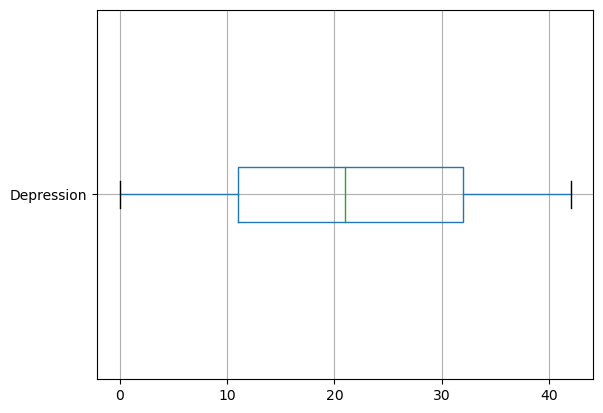

In [255]:
data.boxplot(column='Depression', vert=False)

# show the plot
plt.show()

In [256]:
print(data['Depression'])

0        27
1        24
2        39
3        16
4        32
         ..
39770    36
39771    38
39772     4
39773    16
39774    27
Name: Depression, Length: 39775, dtype: int64


In [257]:
data['Depression Category'] = pd.cut(data['Depression'], bins=[-1, 9, 13, 20, 27, float('inf')], labels=['Normal', 'Mild', 'Moderate', 'Severe', 'Extremely Severe'])
data['Anxiety Category'] = pd.cut(data['Anxiety'], bins=[-1, 7, 9, 14, 19, float('inf')], labels=['Normal', 'Mild', 'Moderate', 'Severe', 'Extremely Severe'])
data['Stress Category'] = pd.cut(data['Stress'], bins=[-1, 14, 18, 25, 33, float('inf')], labels=['Normal', 'Mild', 'Moderate', 'Severe', 'Extremely Severe'])
print(data['Stress Category'])

0        Extremely Severe
1                  Severe
2                    Mild
3                    Mild
4                  Severe
               ...       
39770                Mild
39771    Extremely Severe
39772              Normal
39773              Severe
39774                Mild
Name: Stress Category, Length: 39775, dtype: category
Categories (5, object): ['Normal' < 'Mild' < 'Moderate' < 'Severe' < 'Extremely Severe']


In [258]:
categories = ['Normal', 'Mild', 'Moderate', 'Severe', 'Extremely Severe']
depression_categories = pd.cut(data['Depression'], [0, 9, 13, 20, 27, float('inf')], labels=categories)
anxiety_categories = pd.cut(data['Anxiety'], [0, 7, 9, 14, 19, float('inf')], labels=categories)
stress_categories = pd.cut(data['Stress'], [0, 14, 18, 25, 33, float('inf')], labels=categories)

# Tabelle mit den Anzahl der Befragten in jeder Kategorie
category_counts = pd.DataFrame({
    'Depression': depression_categories.value_counts(),
    'Anxiety': anxiety_categories.value_counts(),
    'Stress': stress_categories.value_counts()
})
print(category_counts)

                  Depression  Anxiety  Stress
Normal                  7999     8814   11489
Mild                    3786     2764    4921
Moderate                7079     7048    8730
Severe                  6477     6113    8575
Extremely Severe       13577    14122    5749


## Verteilung der Geschlechter innerhalb einzelner Kategorien

In [278]:
gender_depression_counts=data.groupby([gender,'Depression Category']).size().unstack()
#gender_depression_counts = (data.groupby([gender,'Stress Category']).size().unstack() / len(data)) * 100
gender_depression_counts

Depression Category,Normal,Mild,Moderate,Severe,Extremely Severe
gender,,,,,
Anderes,11,4,14,12,26
Männlich,2203,836,1505,1409,2836
Weiblich,6593,2915,5476,4968,10415


In [279]:
gender_stress_counts=data.groupby([gender,'Stress Category']).size().unstack()
#gender_stress_counts = (data.groupby([gender,'Stress Category']).size().unstack() / len(data)) * 100
gender_stress_counts

Stress Category,Normal,Mild,Moderate,Severe,Extremely Severe
gender,,,,,
Anderes,21,8,9,17,12
Männlich,3392,1181,1820,1518,878
Weiblich,8303,3679,6763,6890,4732


In [281]:
gender_anxiety_counts=data.groupby([gender,'Anxiety Category']).size().unstack()
gender_anxiety_counts = (data.groupby([gender,'Anxiety Category']).size().unstack() / len(data)) * 100
#gender_anxiety_counts['Total'] = gender_anxiety_counts.sum(axis=1)
#gender_anxiety_counts.loc['Total',:] = gender_anxiety_counts.sum(axis=0)
gender_anxiety_counts


Anxiety Category,Normal,Mild,Moderate,Severe,Extremely Severe,Total
gender,,,,,,
Anderes,0.042740,0.010057,0.040226,0.015085,0.060339,0.168448
Männlich,7.474544,1.707102,4.040226,3.185418,5.689503,22.096794
Weiblich,16.769327,5.166562,13.420490,11.977373,29.013199,76.346952
Total,24.286612,6.883721,17.500943,15.177876,34.763042,98.612194


### Kurzbeschreibung:
Die Tabelle zeigt die Verteilung der Geschlechter je Kategorie in Prozent.
### Auffälligkeiten:
Es wirkt anhand der Tabellen so, als würden Frauen eher unter Depressionen, Angstzuständen und Stress leiden. Es soll an dieser Stelle allerdings angemerkt werden, dass die Anzahl an Frauen innerhalb der Kategorien deutlich höher ist als innerhalb anderer Kategorien, weil die Frauen auch in einem viel höheren Maß an der Umfrage teilgenommen haben. Vergleicht man allerdings Männer und Frauen, so erweckt es dennoch den Anschein, als würden Männer seltener an psychischen Krankheiten leiden. Dies wird unten nochmals genauer analysiert werden.


In [262]:
orientations_depression_counts=data.groupby([orientations,'Depression Category']).size().unstack()
orientations_stress_counts=data.groupby([orientations,'Stress Category']).size().unstack()
orientations_anxiety_counts=data.groupby([orientations,'Anxiety Category']).size().unstack()
orientations_depression_counts

Depression Category,Normal,Mild,Moderate,Severe,Extremely Severe
orientation,,,,,
Anderes,662,317,600,596,1285
Asexuell,409,158,312,333,764
Bisexuell,723,370,803,830,2280
Heterosexuell,6047,2447,4420,3831,7524
Homosexuell,344,169,343,336,763
Nicht beantwortet,671,325,601,551,961


In [263]:
orientations_stress_counts

Stress Category,Normal,Mild,Moderate,Severe,Extremely Severe
orientation,,,,,
Anderes,875,398,745,798,644
Asexuell,559,238,419,435,325
Bisexuell,1002,570,1160,1290,984
Heterosexuell,7956,3092,5274,4893,3054
Homosexuell,507,255,425,449,319
Nicht beantwortet,901,368,707,710,423


In [264]:
orientations_anxiety_counts

Anxiety Category,Normal,Mild,Moderate,Severe,Extremely Severe
orientation,,,,,
Anderes,632,200,581,505,1542
Asexuell,410,134,329,291,812
Bisexuell,832,273,831,807,2263
Heterosexuell,6853,1819,4462,3634,7501
Homosexuell,419,117,323,312,784
Nicht beantwortet,582,221,522,564,1220


### Kurzbeschreibung:
Analog zu den Geschlechtern, wurde nun eine Tabelle zu der Verteilung der Sexuellen Orientierung innerhalb der einzelnen Kategorien gemacht.
### Auffälligkeiten:
Bedenkt man, dass diverse Menschen unter den Befragten, die geringste gruppe ausmachen, so ist auffällig, dass die Werte verhältnismäßig relativ hoch sind. Dies wird unten nochmals genauer thematisiert werden, aber es liegt die Vermutung vor, dass Menschen, der LGBTQ+ Community eher von den untersuchten, psychischen Erkrankungen betroffen sind, als heterosexuelle Menschen.

In [265]:
'''
gender_depression_counts.plot(kind='bar', stacked=True)
plt.title('Verteilung der Depressionsschweregrade nach Geschlecht')
plt.xlabel('Depressionsschweregrade')
plt.ylabel('Anteil')
plt.legend(title='Geschlecht', loc='center left', bbox_to_anchor=(1, 0.5))

gender_anxiety_counts.plot(kind='bar', stacked=True)
plt.title('Verteilung der Angstschweregrade nach Geschlecht')
plt.xlabel('Angstschweregrade')
plt.ylabel('Anteil')
plt.legend(title='Geschlecht', loc='center left', bbox_to_anchor=(1, 0.5))

gender_stress_counts.plot(kind='bar', stacked=True)
plt.title('Verteilung der Stressschweregrade nach Geschlecht')
plt.xlabel('Stressschweregrade')
plt.ylabel('Anteil')
plt.legend(title='Geschlecht', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()'''


"\ngender_depression_counts.plot(kind='bar', stacked=True)\nplt.title('Verteilung der Depressionsschweregrade nach Geschlecht')\nplt.xlabel('Depressionsschweregrade')\nplt.ylabel('Anteil')\nplt.legend(title='Geschlecht', loc='center left', bbox_to_anchor=(1, 0.5))\n\ngender_anxiety_counts.plot(kind='bar', stacked=True)\nplt.title('Verteilung der Angstschweregrade nach Geschlecht')\nplt.xlabel('Angstschweregrade')\nplt.ylabel('Anteil')\nplt.legend(title='Geschlecht', loc='center left', bbox_to_anchor=(1, 0.5))\n\ngender_stress_counts.plot(kind='bar', stacked=True)\nplt.title('Verteilung der Stressschweregrade nach Geschlecht')\nplt.xlabel('Stressschweregrade')\nplt.ylabel('Anteil')\nplt.legend(title='Geschlecht', loc='center left', bbox_to_anchor=(1, 0.5))\n\nplt.show()"

In [266]:

'''gender_depression_counts.plot(kind='bar', stacked=True)
plt.title('Verteilung der Depressionsschweregrade nach Geschlecht')
plt.xlabel('Geschlecht')
plt.ylabel('Anteil')

gender_anxiety_counts.plot(kind='bar', stacked=True)
plt.title('Verteilung der Angstschweregrade nach Geschlecht')
plt.xlabel('Geschlecht')
plt.ylabel('Anteil')

gender_stress_counts.plot(kind='bar', stacked=True)
plt.title('Verteilung der Stressschweregrade nach Geschlecht')
plt.xlabel('Geschlecht')
plt.ylabel('Anteil')

plt.show()'''


"gender_depression_counts.plot(kind='bar', stacked=True)\nplt.title('Verteilung der Depressionsschweregrade nach Geschlecht')\nplt.xlabel('Geschlecht')\nplt.ylabel('Anteil')\n\ngender_anxiety_counts.plot(kind='bar', stacked=True)\nplt.title('Verteilung der Angstschweregrade nach Geschlecht')\nplt.xlabel('Geschlecht')\nplt.ylabel('Anteil')\n\ngender_stress_counts.plot(kind='bar', stacked=True)\nplt.title('Verteilung der Stressschweregrade nach Geschlecht')\nplt.xlabel('Geschlecht')\nplt.ylabel('Anteil')\n\nplt.show()"

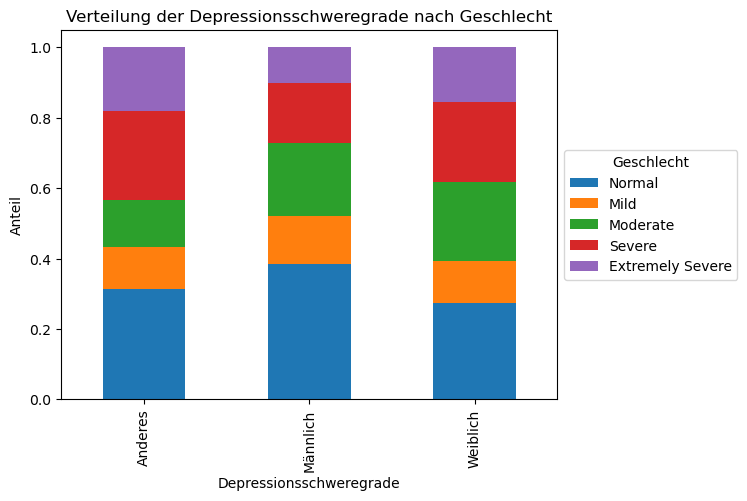

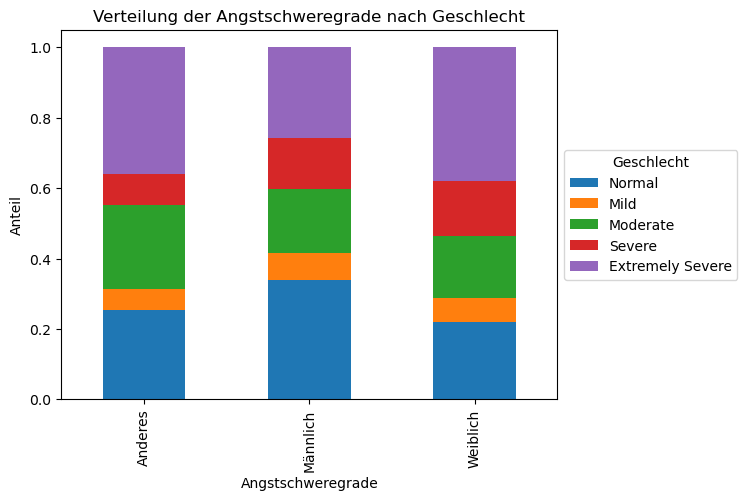

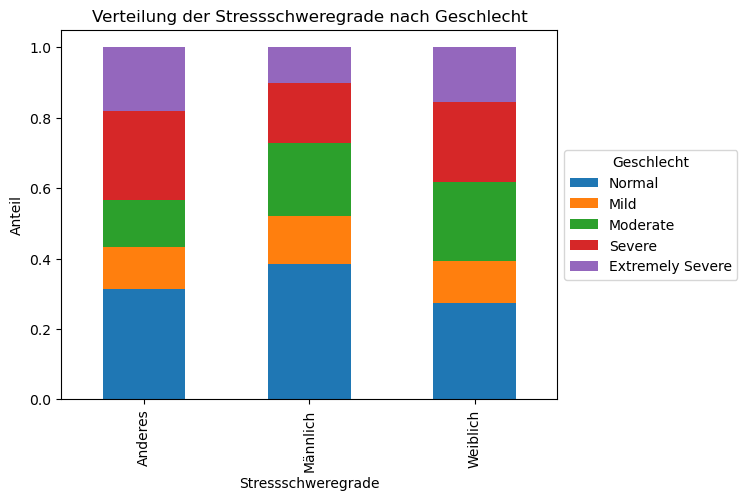

In [267]:

gender_depression_counts = gender_depression_counts.div(gender_depression_counts.sum(axis=1), axis=0)
gender_anxiety_counts = gender_anxiety_counts.div(gender_anxiety_counts.sum(axis=1), axis=0)
gender_stress_counts = gender_stress_counts.div(gender_stress_counts.sum(axis=1), axis=0)
gender_depression_counts.plot(kind='bar', stacked=True)
plt.title('Verteilung der Depressionsschweregrade nach Geschlecht')
plt.xlabel('Depressionsschweregrade')
plt.ylabel('Anteil')
plt.legend(title='Geschlecht', loc='center left', bbox_to_anchor=(1, 0.5))

gender_anxiety_counts.plot(kind='bar', stacked=True)
plt.title('Verteilung der Angstschweregrade nach Geschlecht')
plt.xlabel('Angstschweregrade')
plt.ylabel('Anteil')
plt.legend(title='Geschlecht', loc='center left', bbox_to_anchor=(1, 0.5))

gender_stress_counts.plot(kind='bar', stacked=True)
plt.title('Verteilung der Stressschweregrade nach Geschlecht')
plt.xlabel('Stressschweregrade')
plt.ylabel('Anteil')
plt.legend(title='Geschlecht', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Balkenspaltendiagrammananlyse Geschlechter
Innerhalb der Geschlechter, zieht sich eine ähnliche Verteilung innerhalb der 3 Balkenspaltendiagramme durch. Die Männer leiden in einem geringerem Ausmaß an Depressionen, Stress und Angstzustännden, als Frauen und diverse Menschen. Frauen und diverse Menschen weisen auf den ersten Blick einen relativ ähnlichen Anteil innerhalb der Kategorien an pschischen Erkrankungen auf. Jedoch ist auffällig, dass die Kategorie "Moderate" bei den Frauen fast immer größer als bei diversen Menschen ist und dahingegen die Kategorie "Severe" höher ist bei diversen Menschen, was darauf schließen lässt, dass diese Gruppe eher von psychischen Erkrankungen betroffen ist.

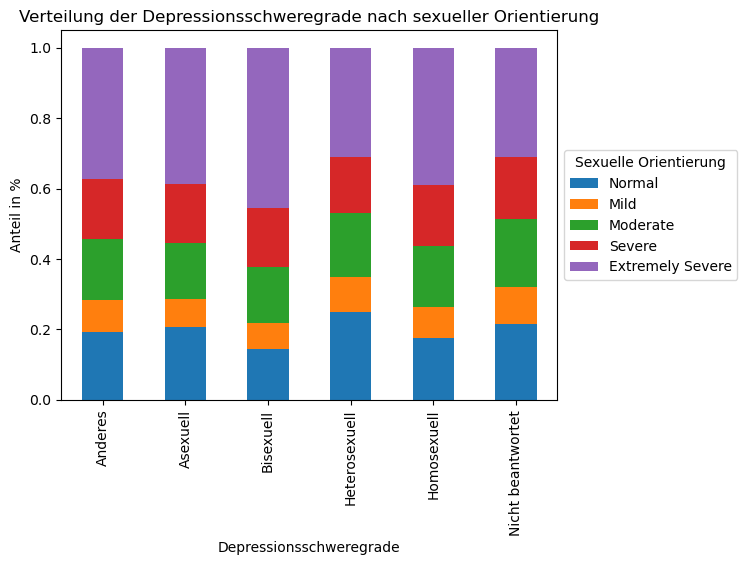

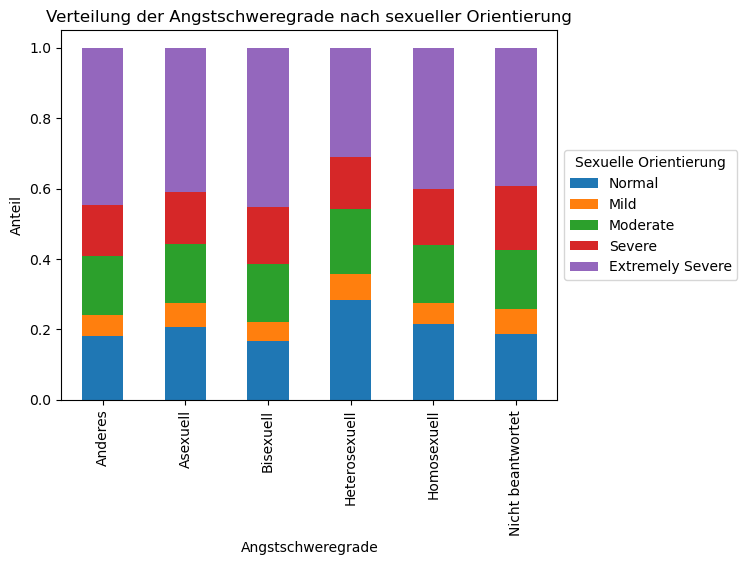

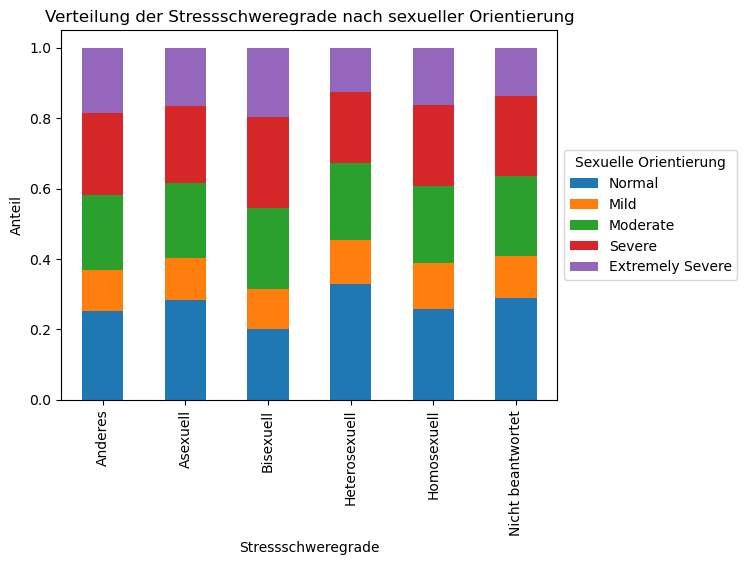

In [270]:
orientations_depression_counts=orientations_depression_counts.div(orientations_depression_counts.sum(axis=1), axis=0)
orientations_anxiety_counts = orientations_anxiety_counts.div(orientations_anxiety_counts.sum(axis=1), axis=0)
orientations_stress_counts = orientations_stress_counts.div(orientations_stress_counts.sum(axis=1), axis=0)
orientations_depression_counts.plot(kind='bar', stacked=True)
plt.title('Verteilung der Depressionsschweregrade nach sexueller Orientierung')
plt.xlabel('Depressionsschweregrade')
plt.ylabel('Anteil in %')
#labels=['Heterosexuel','Bisexuell','Homosexuell','Asexuell','Anderes']
#plt.xticks(range(len(labels)), labels)
plt.legend(title='Sexuelle Orientierung', loc='center left', bbox_to_anchor=(1, 0.5))

orientations_anxiety_counts.plot(kind='bar', stacked=True)
plt.title('Verteilung der Angstschweregrade nach sexueller Orientierung')
plt.xlabel('Angstschweregrade')
plt.ylabel('Anteil')
plt.legend(title='Sexuelle Orientierung', loc='center left', bbox_to_anchor=(1, 0.5))

orientations_stress_counts.plot(kind='bar', stacked=True)
plt.title('Verteilung der Stressschweregrade nach sexueller Orientierung')
plt.xlabel('Stressschweregrade')
plt.ylabel('Anteil')
plt.legend(title='Sexuelle Orientierung', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

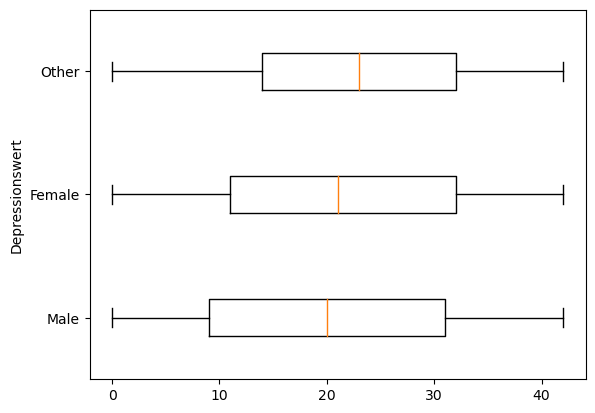

In [271]:
male_depression = data[data['gender'] == 1]['Depression']
female_depression = data[data['gender'] == 2]['Depression']
neutral_depression = data[data['gender'] == 0]['Depression']
depression_values = [male_depression,female_depression, neutral_depression]
fig, ax = plt.subplots()
ax.boxplot(depression_values, vert=False)

ax.set_yticklabels(['Male', 'Female', 'Other'])
ax.set_ylabel('Depressionswert')
plt.show()

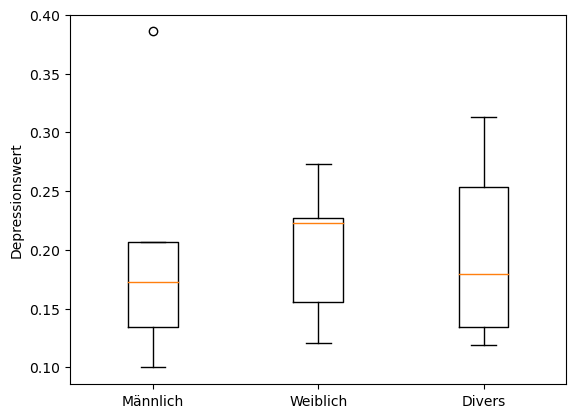

In [274]:
male_depression = gender_depression_counts.loc['Männlich'].dropna()
female_depression = gender_depression_counts.loc['Weiblich'].dropna()
neutral_depression = gender_depression_counts.loc['Anderes'].dropna()
depression_values = [male_depression, female_depression, neutral_depression]
fig, ax = plt.subplots()
ax.boxplot(depression_values)
ax.set_xticklabels(['Männlich', 'Weiblich', 'Divers'])
ax.set_ylabel('Depressionswert')
plt.show()

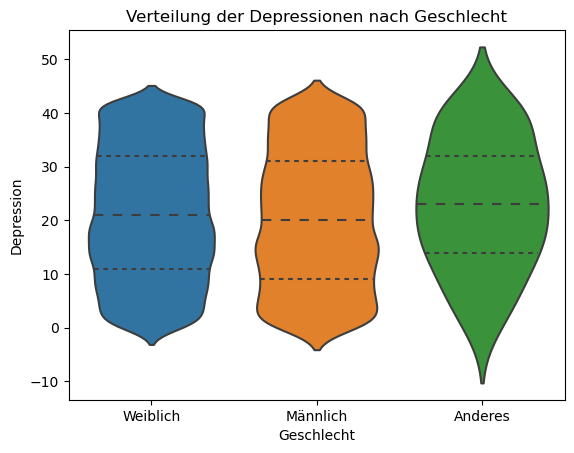

In [275]:
sns.violinplot(data=data, x=gender, y='Depression', inner='quartile')
plt.title('Verteilung der Depressionen nach Geschlecht')
plt.xlabel('Geschlecht')
plt.ylabel('Depression')
plt.show()

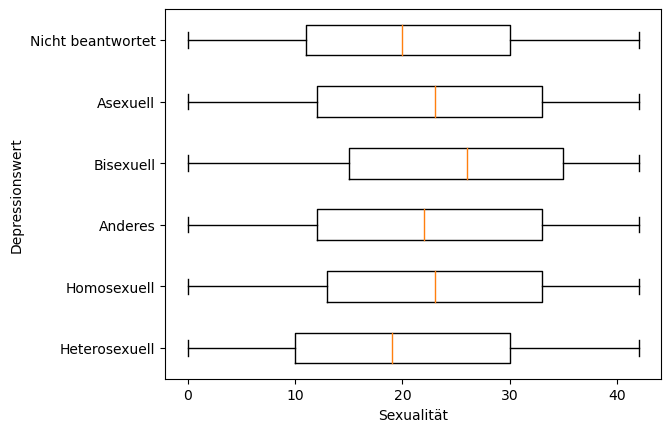

In [276]:
Heterosexual_depression = data[data['orientation']==1]['Depression']
Homosexual_depression = data[data['orientation'] == 3]['Depression']
Oth_depression = data[data['orientation'] == 5]['Depression']
Bisexual_depression = data[data['orientation'] == 2]['Depression']
Asexual_depression = data[data['orientation'] == 4]['Depression']
Not_def_depression=data[data['orientation'] == 0]['Depression']
depression_values = [Heterosexual_depression, Homosexual_depression, Oth_depression,Bisexual_depression, Asexual_depression,Not_def_depression]
fig, ax = plt.subplots()
ax.boxplot(depression_values, vert=False)
ax.set_yticklabels(['Heterosexuell', 'Homosexuell', 'Anderes','Bisexuell', 'Asexuell','Nicht beantwortet'])
ax.set_xlabel('Sexualität')
ax.set_ylabel('Depressionswert')
plt.show()

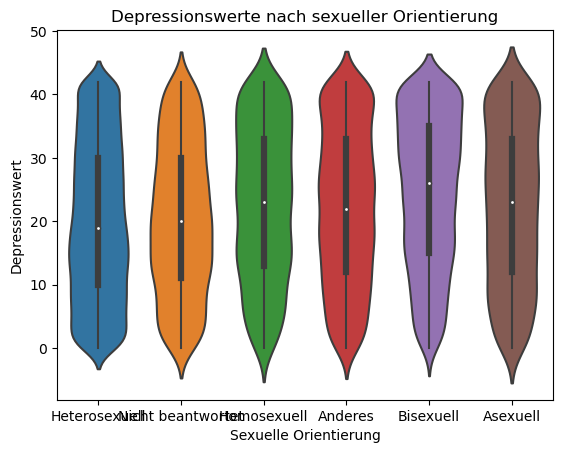

In [277]:
data_orientation = data[['Depression', 'orientation']]
sns.violinplot(x=orientations.values, y='Depression', data=data)
plt.title('Depressionswerte nach sexueller Orientierung')
plt.xlabel('Sexuelle Orientierung')
plt.ylabel('Depressionswert')
plt.show()